# weCAN: A Cancer Survivability Predictor

## Modelling Iteration 1(Not in use)

#### Author: Rahim Kaba
#### Contact: rkaba91@gmail.com
#### Date: Sept-Dec 2023

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [46]:
df = pd.read_csv('/Users/RahimKaba/Desktop/Cancer_Survivability_Predictor/Data/cancer_data_EDA_FeatureEngineer.csv', index_col=0)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 78 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Female Genital           25771 non-null  int64  
 9   Distant Mets: Head and Neck            25771 non-null  int64  
 10  Distant Mets: Intra-Abdominal          25771 no

In [48]:
df.head()

,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,...,organ_Core GI,organ_Developmental GI Tract,organ_Endocrine,organ_Genitourinary,organ_Gynecologic,organ_Head and Neck,organ_Skin,organ_Soft Tissue,organ_Thoracic,Overall Survival (Years)
Sample ID,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
P-0000015-T01-IM3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
P-0000024-T01-IM3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
P-0000025-T02-IM5,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4
P-0000026-T01-IM3,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,7


In [49]:
X = df.drop(columns=['Overall Survival (Years)'])
y = df['Overall Survival (Years)']

In [50]:
y

Sample ID
P-0000004-T01-IM3    1
P-0000015-T01-IM3    2
P-0000024-T01-IM3    3
P-0000025-T02-IM5    4
P-0000026-T01-IM3    7
                    ..
P-0050559-T01-IM6    1
P-0050565-T01-IM6    1
P-0050566-T01-IM6    1
P-0050567-T01-IM6    1
P-0050568-T01-IM6    0
Name: Overall Survival (Years), Length: 25771, dtype: int64

In [66]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [68]:
X_train_full.shape, X_train.shape, X_val.shape, X_test.shape

((20616, 77), (16492, 77), (4124, 77), (5155, 77))

In [69]:
y_train_full.shape, y_train.shape, y_val.shape, y_test.shape

((20616,), (16492,), (4124,), (5155,))

Linear Regression:


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
preds = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.0255903068588188
Mean Squared Error: 1.7274806089394443
Root Mean Squared Error: 1.3143365660817035
R-squared: 0.22344260264380023


Ridge regression



In [71]:
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression object
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Fit the model
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print(f'train score:{ridge.score(X_train_scaled, y_train)}')
print(f'test score: {ridge.score(X_test_scaled, y_test)}')



Mean Squared Error: 1.7274797668697415
train score:0.2235650762691015
test score: 0.22344298118087524


Naive Bayes


In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'micro', 'macro', or 'binary' for multi-class problems
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



Accuracy: 0.16411251212415132
F1 Score: 0.182997292198254
Precision: 0.3376295361118196
Recall: 0.16411251212415132


In [77]:
df_2 = pd.read_csv('/Users/RahimKaba/Desktop/Cancer_Survivability_Predictor/Data/cancer_data_EDA_FeatureEngineer_test.csv', index_col=0)

In [78]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 78 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Female Genital           25771 non-null  int64  
 9   Distant Mets: Head and Neck            25771 non-null  int64  
 10  Distant Mets: Intra-Abdominal          25771 no

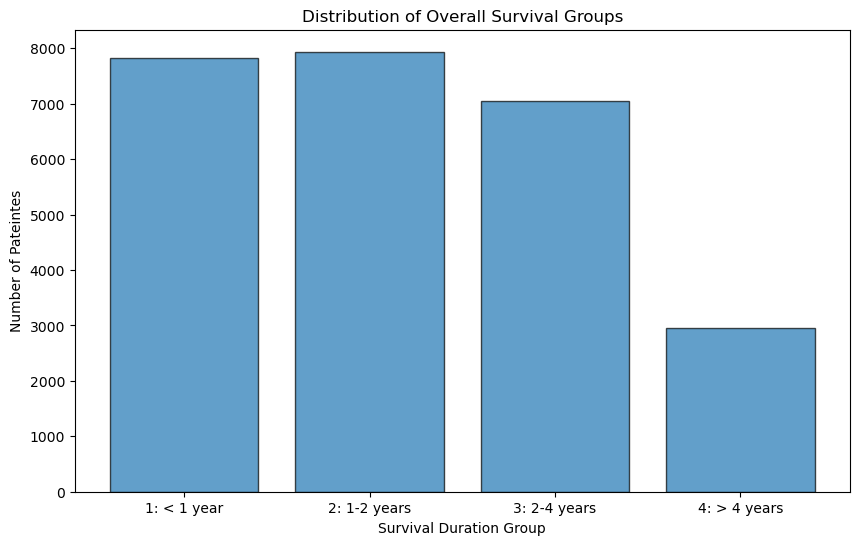

In [91]:
#check out target feature:

group_values = df_2['Year Group Encoded'].value_counts()
group_values_sorted = group_values.sort_index()


plt.figure(figsize=(10, 6))  
plt.bar(group_values_sorted.index, group_values_sorted.values, edgecolor='k', alpha=0.7) 
plt.title(f'Distribution of Overall Survival Groups') 
plt.xlabel('Survival Duration Group')
plt.xticks(group_values_sorted.index, ['1: < 1 year', '2: 1-2 years', '3: 2-4 years', '4: > 4 years'])
plt.ylabel('Number of Pateintes')
plt.show()  

In [92]:
X = df_2.drop(columns=['Year Group Encoded'])
y = df_2['Year Group Encoded']

In [93]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [95]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [96]:
X_train_full.shape, X_train.shape, X_val.shape, X_test.shape

((20616, 77), (16492, 77), (4124, 77), (5155, 77))

In [97]:
y_train_full.shape, y_train.shape, y_val.shape, y_test.shape

((20616,), (16492,), (4124,), (5155,))

In [99]:
# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
preds = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.7324187637355359
Mean Squared Error: 0.7727161194862655
Root Mean Squared Error: 0.8790427290446498
R-squared: 0.22427401163106675


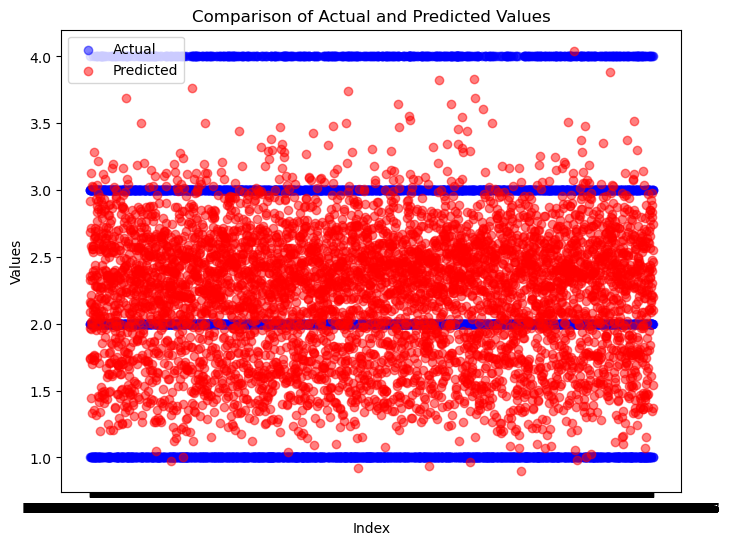

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot actual values in blue
plt.scatter(y_test.index, y_test, color='blue', alpha=0.5, label='Actual')

# Plot predicted values in red
plt.scatter(y_test.index, preds, color='red', alpha=0.5, label='Predicted')
plt.legend()  # Add a legend to label the colors
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.show()

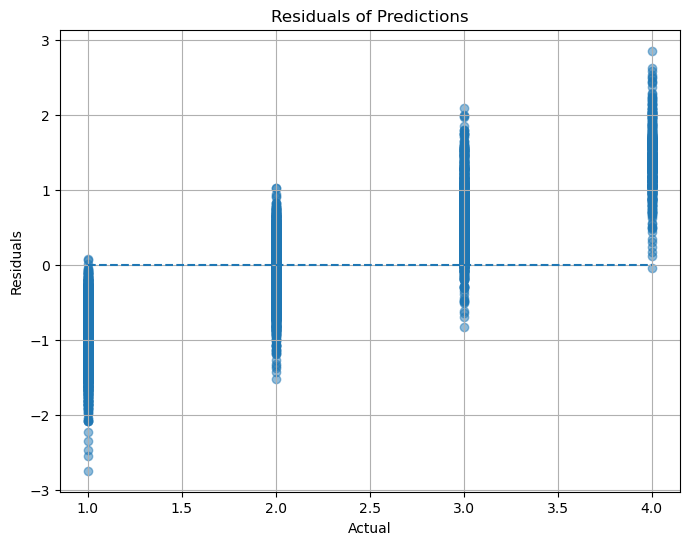

In [104]:
residuals = y_test - preds

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), linestyles='dashed')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.grid(True)
plt.show()

### See `Modelling and Feature Engineering` notebook for most upto date version this was an iteration that I will not be using for now